## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

Corresponding with this notebook is a slide deck where you will need to update all the portions in red.  Completing the notebook will provide all the results needed for the slides.  **Correctly completing the slides is a required part of the project.**

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [358]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(0)

For each of the parts of question `1` notice links to [pandas documentation](https://pandas.pydata.org/) is provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`1.a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**:

In [402]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

In [403]:
rows_count= df.shape[0]
print(f'The number of rows is {rows_count}')

The number of rows is 69889


In [404]:
# Count the number of rows where group == "control"
control_count = df.query('group == "control"').shape[0]
print(f'Number of rows where group == "control": {control_count}')

Number of rows where group == "control": 34678


`c)` The proportion of users converted.  [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

In [406]:
prop_users = df.mean(numeric_only=True)
print(f'The proportion of users converted is {prop_users}')

The proportion of users converted is converted    0.130478
dtype: float64


`d)` Do any of the rows have missing values? [Helpful Pandas Link One](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [Helpful Pandas Link Two](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [407]:
df.isnull()
blankvalues_rows = df.isnull().sum(axis=1)
total_blank_rows = blankvalues_rows == df.shape[1]
blank_rows_count = total_blank_rows.sum()
print(f'The number of blank rows is {blank_rows_count}')

The number of blank rows is 0


`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [408]:
# number of visitors from each country - pull the necessary code from the next cell to provide just the counts
country_counts = df['country'].value_counts()
print(country_counts)

country
US    48850
UK    17551
CA     3488
Name: count, dtype: int64


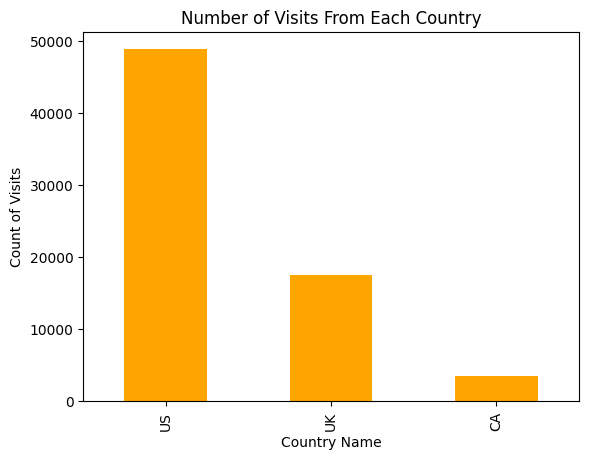

In [409]:
# bar chart of results - this part is done for you
df['country'].value_counts().plot(kind='bar', color='orange');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.xlabel('Country Name');
plt.show();

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? [Helpful Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

In [410]:
non_cat = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
print(f'The columns are categorical. However, the columns that is not categorical is: {non_cat}')

The columns are categorical. However, the columns that is not categorical is: ['converted']


`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 

**Here you can use one of the functions you used in an earlier question**.

In [411]:
non_cat_select = df.select_dtypes(exclude=['object','category']).columns.tolist()
type = df[non_cat_select].dtypes
values = df['converted'].unique()
print(f'The type of data in the non-categorical column is {type}\nThe values include {values}')

#The output highlights that the type of data found in the 'category' column is int64 (integer)
#The only two possible integers available in the column are 0 and 1 in which indicate that 0 is utilized to represent 'no' (individuals did not convert)
#1 is utilized to represent 'yes' (individuals did convert)
#For the purpose of the column, having 0 and 1 make sense, however, for better analyis, further columns and associated values should be present to give more context


The type of data in the non-categorical column is converted    int64
dtype: object
The values include [0 1]


<a id='probability'></a>
#### Part II - Probability

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [412]:
convert_prob = df['converted'].mean()
print(f'The probability of the user converting regardless of the page/country is {convert_prob}')

The probability of the user converting regardless of the page/country is 0.13047832992316388


`b)` Given that an individual was in the `control` group, what is the probability they converted? **This question is completed for you**

In [413]:
group_control = df.query('group == "control"')['converted'].mean()
print(f'Given that an individual was in the `control` group, the probability that they have converted is {group_control}')

Given that an individual was in the `control` group, the probability that they have converted is 0.1052540515600669


`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [414]:
group_treatment = df.query('group == "treatment"')['converted'].mean()
print(f'Given that an individual was in the `treatment` group, the probability that they have converted is {group_treatment}')

Given that an individual was in the `treatment` group, the probability that they have converted is 0.15532078043793132


`d)` Do you see evidence that the treatment is related to higher `converted` rates?

In [415]:
control_g = df.query('group == "control"')['converted'].mean()
treat_g = df.query('group == "treatment"')['converted'].mean()
print(f'Control group probability of conversion is: {control_g:.2f}')
print(f'Treatment group probability of conversion is: {treat_g:.2f}')
if treat_g > control_g:
    print('The conversion rates among the individuals in the treatment group are higher.')
else:
    print('The conversion rates among the individuals in the control group are higher')

Control group probability of conversion is: 0.11
Treatment group probability of conversion is: 0.16
The conversion rates among the individuals in the treatment group are higher.


`e)` What is the probability that an individual was in the `treatment`?

In [416]:
treat_count = df.query('group == "treatment"').shape[0]
total = df.shape[0]
p_treatment = treat_count / total
print(f'The probability that an individual was in the treatment group is {p_treatment:.4f}')

The probability that an individual was in the treatment group is 0.5038


`f)` What is the probability that an individual was from Canada `CA`?

In [417]:
p_CA = df.query('country == "CA"').shape[0] / df.shape[0]
print(f'The probability that an individual was from Canada is: {p_CA}')

The probability that an individual was from Canada is: 0.04990771079855199


`g)` Given that an individual was in the `US`, what was the probability that they `converted`? **This question is completed for you**

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [373]:
p_US_convert = df.query('country == "US"')['converted'].mean()
print(f'The probability of an individual converting if they are from the US is {p_US_convert}')

The probability of an individual converting if they are from the US is 0.13277379733879222


`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [418]:
p_UK_convert = df.query('country == "UK"')['converted'].mean()
print(f'The probability of an individual converting if they are from the UK is {p_UK_convert}')

The probability of an individual converting if they are from the UK is 0.12512107572218106


`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

In [375]:
countries = df['country'].unique()
for c in countries:
    conversion_rates = df.query(f'country == "{c}"').groupby('group')['converted'].mean()
    print(f'\n{c} Individuals Rate of Converting:')
    for group, rate in conversion_rates.items():
        print(f'  {group.capitalize()} Group Conversion Rate: {rate:.4f}')

#From the output, it shows that the rate of converting differs from country to country as per where the individual is from



UK Individuals Rate of Converting:
  Control Group Conversion Rate: 0.1016
  Treatment Group Conversion Rate: 0.1487

US Individuals Rate of Converting:
  Control Group Conversion Rate: 0.1073
  Treatment Group Conversion Rate: 0.1578

CA Individuals Rate of Converting:
  Control Group Conversion Rate: 0.0945
  Treatment Group Conversion Rate: 0.1540


`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [376]:
# Method 1  - explicitly calculate each probability
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848


In [377]:
# Method 2 - quickly calculate using `groupby`
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [419]:
#US
control_us = (df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]*100) 
treatment_us = (df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0]*100)

#UK
control_uk = (df.query('country == "UK" and group == "control" and converted == 1').shape[0]/df.query('country == "UK" and group == "control"').shape[0]*100) 
treatment_uk = (df.query('country == "UK" and group == "treatment" and converted == 1').shape[0]/df.query('country == "UK" and group == "treatment"').shape[0]*100)

#CA
control_ca = (df.query('country == "CA" and group == "control" and converted == 1').shape[0]/df.query('country == "CA" and group == "control"').shape[0]*100) 
treatment_ca = (df.query('country == "CA" and group == "treatment" and converted == 1').shape[0]/df.query('country == "CA" and group == "treatment"').shape[0]*100)

print(f'Control UK: {control_uk}\nTreatment UK: {treatment_uk}\n\nControl Canada: {control_ca}\nTreatment Canada {treatment_ca}\n\nControl US: {control_us}\nTreatment US:{treatment_us}')

Control UK: 10.164866401364412
Treatment UK: 14.8698035632709

Control Canada: 9.44741532976827
Treatment Canada 15.401662049861494

Control US: 10.731404958677686
Treatment US:15.776876267748479


<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 4** in the classroom to make sure you are on the right track.<br><br>

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations you will run for the rest of this section.**

In [420]:
p_control_treatment_null  = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [421]:
# treatment_converted = 
p_control_treatment_null = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
treatment_converted = np.random.binomial(1, p_control_treatment_null, n_treatment).tolist()
print(treatment_converted)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [422]:
# control_converted = 
p_control_treatment_null = df['converted'].mean()
n_control = df.query('group == "control"').shape[0]
control_converted = np.random.binomial(1, p_control_treatment_null, n_control).tolist()
print(control_converted)

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [424]:
p_treatment = np.mean(treatment_converted)
p_control = np.mean(control_converted)
p_diff_simulated = (p_treatment - p_control)
print(f"The simulated p_treatment is: {p_treatment:.2f}\nThe simulated p_treatment is: {p_control:.2f}\nThe estimated p_treatment - p_control under the null is: {p_diff_simulated:.4f}")


The simulated p_treatment is: 0.13
The simulated p_treatment is: 0.13
The estimated p_treatment - p_control under the null is: -0.0013


`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [425]:
p_diffs = []
for _ in range(500):
    # simulate the treatment and control converted arrays
    treatment_converted = np.random.binomial(1, p_control_treatment_null, n_treatment).tolist()
    control_converted = np.random.binomial(1, p_control_treatment_null, n_control).tolist()
    
    # calculate p_treatment and p_control under the null
    p_treatment_simulated = np.mean(treatment_converted)
    p_control_simulated = np.mean(control_converted)
    
    # calculate the difference between p_treatment_null and p_control_null
    p_diff_simulated = p_treatment_simulated - p_control_simulated
    
    # add p_diff to the p_diffs array
    p_diffs.append(p_diff_simulated)

p_diffs = np.array(p_diffs)
print(p_diffs[:100]) #I didn't print 500 since that is too long of an output



[-2.00052814e-03 -1.89516037e-04  2.73003156e-03 -4.39531299e-03
 -5.16350288e-04  7.67797599e-04 -6.86724557e-04 -2.29849864e-03
  8.71358719e-04 -3.53195724e-03 -2.52177177e-03  3.59996199e-03
 -3.08104587e-03 -1.12320405e-03  2.83708476e-03  1.71638102e-03
 -2.61221054e-03 -2.02720934e-03  4.97888674e-03 -1.74187062e-03
 -4.79165808e-04 -3.93741746e-03  1.97174219e-04  1.38867375e-03
 -2.27841915e-03  4.80627586e-03  1.00111047e-03 -2.02194419e-03
 -7.47453584e-04 -2.80827834e-04 -9.48448295e-06 -1.29054977e-03
 -2.01757908e-03  2.79515272e-03 -1.18000448e-03  6.87049688e-05
 -1.56227558e-03  1.32442561e-03  5.42805452e-04 -4.86177004e-04
  1.25496637e-03 -1.28705769e-03  1.23376899e-04  5.97423330e-04
  2.98781605e-03 -2.40819793e-03  2.39711318e-03  1.86010112e-03
 -1.30539113e-03 -1.35477088e-03 -9.10407173e-04 -2.16566428e-03
  4.85789222e-03  1.05092674e-03 -2.40729788e-03  1.74870984e-03
 -3.33361927e-03 -2.55483192e-04 -1.95030239e-03 -3.18457997e-03
 -6.88443573e-04  4.42736

`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

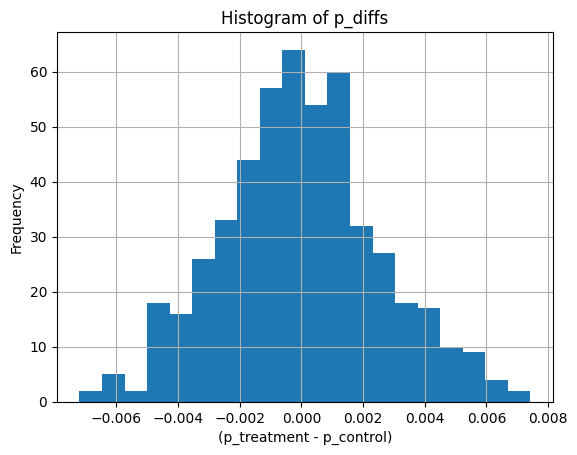

In [427]:
p_diffs = pd.Series(p_diffs)
p_diffs.hist(bins=20)
plt.xlabel('(p_treatment - p_control)')
plt.ylabel('Frequency')
plt.title('Histogram of p_diffs')
plt.show()


`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [385]:
treatment = df.query('group == "treatment"')['converted'].mean()
control = df.query('group == "control"')['converted'].mean()
p_diff = treatment - control
greater_prop = np.mean(p_diffs > p_diff)
print(f"The proportion of p_diffs greater than the observed difference is: {greater_prop:.4f}")


The proportion of p_diffs greater than the observed difference is: 0.0000


`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

In [428]:
#I put it in print function to avoid run error
print("What I computed: I calculated the p - value; the p - value represents the probability of observing a change as extreme or more extreme than the one that was observed in my actual data, assuming that there is no real difference between the control groups (such as under the null hypothesis) or the treatment. This is accomplished by comparing the observed difference to the distribution of differences acquired through simulation under the null hypothesis. ")
print("The p- value assesses the possibility to see a difference that is at least as large as the observed difference if the null hypothesis is true. A low p–value (usually less than the significance level, such as 0.05) suggests that the observed difference is improbable to have taken place by random chance alone, leading me to consider dismissing the null hypothesis and in favor of the alternative hypothesis which suggests that a real difference is present. ")
print("By utilizing a Type I error rate of 0.05 means that I am willing to accept a 5% chance of incorrectly dismissing the null hypothesis when it is true (false positive). If the p-value is less than 0.05, I would dismiss the null hypothesis and surmise that a statistical difference between the control groups and the treatment is present and significant. On the other hand, if the p-value is larger than 0.05, I would not dismiss the null hypothesis which indicates the observed difference could be due to random variation instead of a true effect.")

What I computed: I calculated the p - value; the p - value represents the probability of observing a change as extreme or more extreme than the one that was observed in my actual data, assuming that there is no real difference between the control groups (such as under the null hypothesis) or the treatment. This is accomplished by comparing the observed difference to the distribution of differences acquired through simulation under the null hypothesis. 
The p- value assesses the possibility to see a difference that is at least as large as the observed difference if the null hypothesis is true. A low p–value (usually less than the significance level, such as 0.05) suggests that the observed difference is improbable to have taken place by random chance alone, leading me to consider dismissing the null hypothesis and in favor of the alternative hypothesis which suggests that a real difference is present. 
By utilizing a Type I error rate of 0.05 means that I am willing to accept a 5% chanc

**Your Answer Here**

<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  All the code needed for the modeling and results of the modeling for sections `b) - f)` have been completed for you. 

**You will need to complete sections `a)` and `g)`.**  

**Then use the code from `1.` to assist with the question `2.`   You should be able to modify the code to assist in answering each of question 2's parts.**<br><br>

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

In [387]:
#Logisitc Regression

**Your Answer Here**

The goal is to use **statsmodels** to fit the regression model you specified in part `a)` to see if there is a significant difference in conversion based on which page a customer receives.  

`b)` However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

It may be helpful to look at the [get_dummies documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to encode the `ab_page` column.

Below you can see an example of the new columns that will need to be added (The order of columns is not important.): **This question is completed for you**

##### Example DataFrame
| intercept   | group       | ab_page     | converted   |
| ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  1          |

In [388]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,False
1,US,treatment,1,1,True
2,UK,treatment,0,1,True
3,UK,control,0,1,False
4,UK,treatment,0,1,True


`c)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is a difference in `treatment` vs. `control`. **This question is completed for you**

In [389]:
df['ab_page'] = df['ab_page'].astype(int) #had to define ab_page as int as dtype was object preventing code d to run
X = df[['intercept', 'ab_page']]
y = df['converted']

`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`. 

You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).  **This question is completed for you**

In [390]:
import statsmodels.api as sm
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Provide the summary of your model below. **This question is completed for you**

In [391]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Sep 2024   Pseudo R-squ.:                0.007175
Time:                        10:41:57   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.

In [392]:
#The p value associated with ab_pages as per the output from 'e' is 0.000
#This suggests that there is strong evidence that the treatment page leads to a higher conversion rate when comparing this to the control page.
#This was also suggested from the p-value in the 'experiment' section

**Your Answer Here.**

`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.  Again, use `get_dummies` to add these columns.  The dataframe you create should include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for you to match - it is just to illustrate how columns should connect to one another.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [393]:
### Create the necessary dummy variables
dummy = pd.get_dummies(df['country'], prefix='', prefix_sep='')
dummy = dummy.astype(int)
df = pd.concat([df, dummy], axis=1)
df['intercept'] = 1
df = df[['intercept', 'group', 'ab_page', 'converted', 'country', 'US', 'UK']]
print(df)

       intercept      group  ab_page  converted country  US  UK
0              1    control        0          0      UK   0   1
1              1  treatment        1          1      US   1   0
2              1  treatment        1          0      UK   0   1
3              1    control        0          0      UK   0   1
4              1  treatment        1          0      UK   0   1
...          ...        ...      ...        ...     ...  ..  ..
69884          1  treatment        1          0      UK   0   1
69885          1    control        0          0      UK   0   1
69886          1  treatment        1          0      UK   0   1
69887          1    control        0          0      US   1   0
69888          1  treatment        1          0      US   1   0

[69889 rows x 7 columns]


`b)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [394]:
df = pd.get_dummies(df, columns=['country'], drop_first=True)
print(df[['country_US', 'country_UK']].head())


   country_US  country_UK
0       False        True
1        True       False
2       False        True
3       False        True
4       False        True


In [395]:
df['ab_page'] = df['ab_page'].astype(int) #had to define ab_page as int as dtype was object preventing code c to run [0 = control / 1 = treatment]
df['country_US'] = df['country_US'].astype(int) #had to define UK as int as dtype was object preventing code c to run
df['country_UK'] = df['country_UK'].astype(int) #had to define US as int as dtype was object preventing code c to run

df['intercept'] = 1

# # X = 
X = df[['intercept', 'ab_page', 'country_US', 'country_UK']]
# # y = 
y = df['converted']


`c)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `b)`. 
You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).

In [396]:
import statsmodels.api as sm
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.384463
         Iterations 6


`d)` Provide the summary of your model below.

In [429]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69885
Method:                           MLE   Df Model:                            3
Date:                Sat, 14 Sep 2024   Pseudo R-squ.:                0.007312
Time:                        10:57:33   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.778e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1930      0.053    -41.308      0.000      -2.297      -2.089
ab_page        0.4466      0.023     19.534      0.000       0.402       0.491
country_US     0.0727      0.053      1.372      0.1

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

In [398]:
#The p-values for country_UK (0.905) and country_US (0.170) are both above average significance levels (0.05). 
#This means that a statistical difference in conversion rates for users in the UK or UK compared to the baseline category (CA) is not present as well as significant.
#Therefore, the impact of being in the UK or US on conversion is not significant. 